In [18]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [4]:
###############################################################
#       Data
##################################################################

path_data = '/users/local/c23lacro/data/Fontainebleau_interpolated_subdomain64.npy'
sentinel_data = np.load(path_data)

if np.max(sentinel_data) > 1:
    sentinel_data /= np.max(sentinel_data)


sentinel_data_diff = sentinel_data[1:,...] - sentinel_data[:-1,...]

sentinel_data = torch.tensor(np.append( sentinel_data[1:,...],sentinel_data_diff, axis=1)).float()

In [5]:
sentinel_data.shape

torch.Size([342, 20, 64, 64])

In [70]:
#temporal fft of the data
sentinel_data_fft = torch.fft.rfft(sentinel_data[:240],    dim =0)

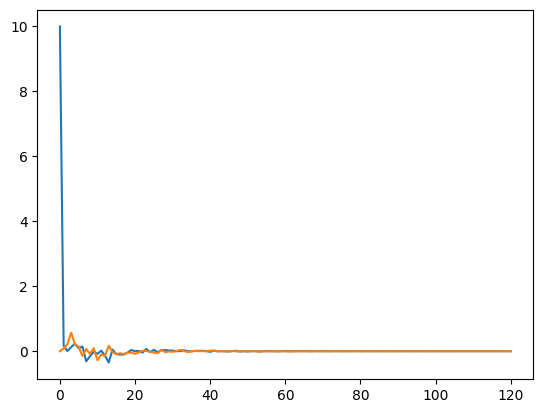

In [71]:
plt.plot(sentinel_data_fft[:,0,0,0].real.numpy())
plt.plot(sentinel_data_fft[:,0,0,0].imag.numpy())

plt.show()



In [110]:
#evaluate at time step 300


#take only 40 modes and reconstruct the signal and prolongate it
sentinel_data_fft[12:] = 0
sentinel_data_reconstructed = torch.fft.irfft(sentinel_data_fft,    dim =0)

#prolongate the signal
# sentinel_data_reconstructed = torch.cat((sentinel_data_reconstructed, sentinel_data_reconstructed[-1:,...].repeat(4,1,1,1)), dim=0)
sentinel_data_reconstructed = torch.cat((sentinel_data_reconstructed, sentinel_data_reconstructed[20:120,...]), dim=0)

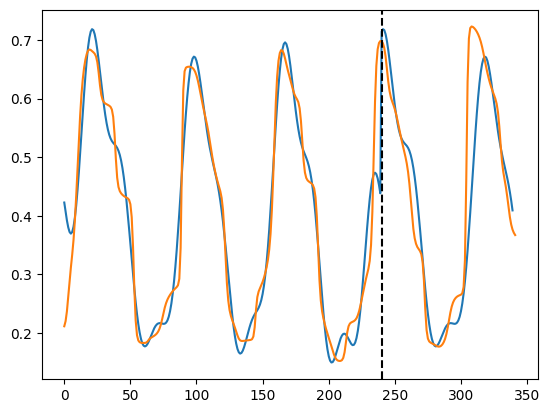

In [117]:
channel = 6
plt.plot(sentinel_data_reconstructed[:,6,10,10].numpy())
plt.plot(sentinel_data[:,6,10,10].numpy())
#vertical line
plt.axvline(x=240, color='black', linestyle='--')

In [37]:
#explained variance 
explained_variance = torch.var(sentinel_data_fft, dim = (1,2,3))

In [38]:
explained_variance.shape

torch.Size([121])

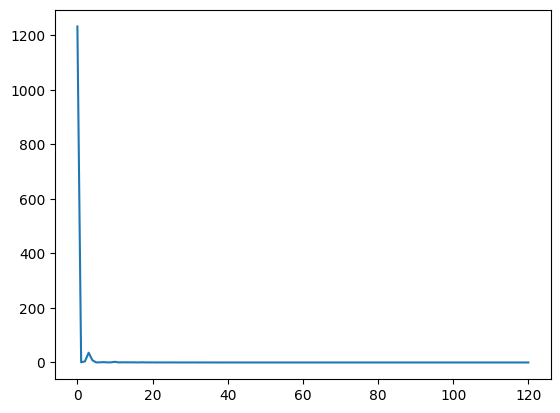

In [39]:
plt.plot(explained_variance.real.numpy())